In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

In [2]:
# Load historical stock price data
data = pd.read_csv('apple_stock.csv')

In [3]:
# Display the first few rows of the dataset
print(data.head())

         Date       Open       High        Low      Close  Adj Close  \
0  2014-01-02  19.845715  19.893929  19.715000  19.754642  17.318729   
1  2014-01-03  19.745001  19.775000  19.301071  19.320715  16.938305   
2  2014-01-06  19.194643  19.528570  19.057142  19.426071  17.030676   
3  2014-01-07  19.440001  19.498571  19.211430  19.287144  16.908880   
4  2014-01-08  19.243214  19.484285  19.238930  19.409286  17.015959   

      Volume  
0  234684800  
1  392467600  
2  412610800  
3  317209200  
4  258529600  


In [4]:
# Feature Engineering: For simplicity, we will use only 'Close' price as the feature
data = data[['Date', 'Close']]
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [5]:
# Create a new feature: 'Next_Close' which represents the next day's closing price
data['Next_Close'] = data['Close'].shift(-1)

In [6]:
# Drop the last row since it will have NaN in 'Next_Close'
data = data.dropna()

In [7]:
# Split the data into features (X) and target variable (y)
X = data[['Close']]
y = data['Next_Close']

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [9]:
# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Train a RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [11]:
# Make predictions
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

In [12]:
# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'Mean Squared Error (Train): {mse_train}')
print(f'Mean Squared Error (Test): {mse_test}')


Mean Squared Error (Train): 0.3333473477430839
Mean Squared Error (Test): 258.2801136721658


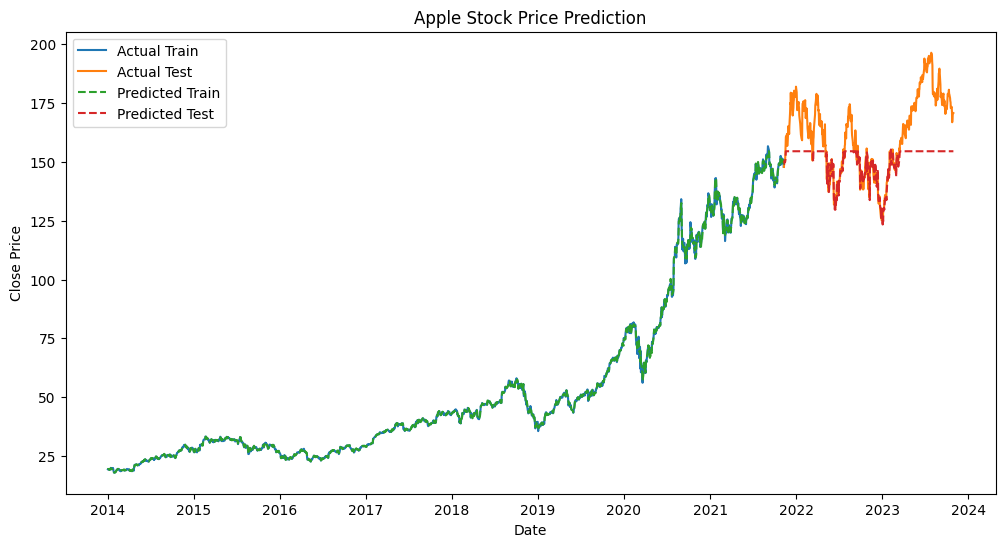

In [13]:
# Visualize the predictions
plt.figure(figsize=(12, 6))

plt.plot(data.index[:-len(X_test)], y_train, label='Actual Train')
plt.plot(data.index[-len(X_test):], y_test, label='Actual Test')
plt.plot(data.index[:-len(X_test)], y_pred_train, label='Predicted Train', linestyle='dashed')
plt.plot(data.index[-len(X_test):], y_pred_test, label='Predicted Test', linestyle='dashed')

plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()